In [1]:
import Figtodat
from images2gif import writeGif
import numpy as np

#helps mapping labels to integers
from sklearn import preprocessing 

# randomnize two numpy arrays
from sklearn.utils import shuffle

import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
def plot_decision(X_matrix, t_vector, weights):
    
    X_START, X_END = X_matrix[:, 1].min() - 1, X_matrix[:, 1].max() + 1
    Y_START, Y_END = X_matrix[:, 2].min() - 1, X_matrix[:, 2].max() + 1

    domain_vector = np.linspace(X_START, X_END)
    a, b = -w_vector[1]/w_vector[2], -w_vector[0]/w_vector[2]
    range_vector = a * domain_vector + b
    
    plt.close("all")
    figure = plt.figure(figsize=(8, 6))
    figure.clf()
    
    axes = plt.gca()
    axes.set_xlim([X_START, X_END])
    axes.set_ylim([Y_START, Y_END])
    
    plt.scatter(X_matrix[:, 1], X_matrix[:, 2], c=t_vector)
    plt.plot(domain_vector, range_vector)
    
    figure.suptitle("Perceptron", fontsize=20)
    plt.legend(loc='upper right')#,prop={'size':20}, bbox_to_anchor=(1, 0.5))
    #figure.set_size_inches(3, 2)

    return figure

In [3]:
data = pd.read_csv( './../Dataset/simple_iris.csv' )
m = data.as_matrix()
labels = m[:,0]
labels[ labels==2 ] = 1  # squash class 2 into class 1
#t_vector = np.atleast_2d( labels ).T
t_vector = labels

data.drop('Target', axis=1, inplace=True)
data.drop('Att3', axis=1, inplace=True)
data.drop('Att4', axis=1, inplace=True)
data.insert(0, "BIAS", np.ones(len(data)))
X_matrix = data.values

DATASET_LENGTH = X_matrix.shape[0] # rows
INPUTS_LENGTH = X_matrix.shape[1] # columns

X_matrix, t_vector = shuffle(X_matrix, t_vector, random_state=0)

w_vector = np.random.rand(INPUTS_LENGTH).reshape(-1,1)
print(w_vector)

[[ 0.5612794 ]
 [ 0.29869722]
 [ 0.92700392]]


In [4]:
# activation function
def activation_function(vector):
    output = np.empty(len(vector))
    for i in range(len(vector)):
        if vector[i] >= 0:
            output[i] = 1
        else:
            output[i] = 0
    return output.astype(int)

In [5]:
perceptron_images = list()

/home/isai/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "
/home/isai/Documents/classes/Deep_Learning_Class_Projects/Lab2_Perceptron/Algorithm/Figtodat.py:44: RuntimeWarning: the frombuffer defaults may change in a future release; for portability, change the call to read:
  frombuffer(mode, size, data, 'raw', mode, 0, 1)
  im=PIL.Image.frombuffer( "RGBA", ( w ,h ), buf.tostring())


x_vector1
[[ 1.]
 [ 0.]
 [ 0.]]
x_vector2
[[   1.]
 [ 123.]
 [ 731.]]
x_vector1
[[  1.00000000e+00]
 [  1.66600000e+03]
 [  4.93700000e+03]]
x_vector2
[[ 1.]
 [ 0.]
 [ 0.]]
x_vector1
[[ 1.]
 [ 0.]
 [ 0.]]
x_vector2
[[   1.]
 [ 123.]
 [ 731.]]
x_vector1
[[ 1.]
 [ 0.]
 [ 0.]]
x_vector2
[[   1.]
 [ 123.]
 [ 731.]]
x_vector1
[[ 1.]
 [ 0.]
 [ 0.]]
x_vector2
[[   1.]
 [ 123.]
 [ 731.]]
x_vector1
[[ 1.]
 [ 0.]
 [ 0.]]
x_vector2
[[   1.]
 [ 123.]
 [ 731.]]
x_vector1
[[ 1.]
 [ 0.]
 [ 0.]]
x_vector2
[[   1.]
 [ 123.]
 [ 731.]]
x_vector1
[[ 1.]
 [ 0.]
 [ 0.]]
x_vector2
[[   1.]
 [ 123.]
 [ 731.]]
x_vector1
[[  1.]
 [ 10.]
 [ 50.]]
x_vector2
[[   1.]
 [  50.]
 [ 192.]]
x_vector1
[[  1.00000000e+00]
 [  1.43000000e+03]
 [  4.38900000e+03]]
x_vector2
[[ 1.]
 [ 0.]
 [ 0.]]
x_vector1
[[ 1.]
 [ 0.]
 [ 0.]]
x_vector2
[[   1.]
 [ 123.]
 [ 731.]]
x_vector1
[[ 1.]
 [ 0.]
 [ 0.]]
x_vector2
[[   1.]
 [ 123.]
 [ 731.]]
x_vector1
[[ 1.]
 [ 0.]
 [ 0.]]
x_vector2
[[   1.]
 [ 123.]
 [ 731.]]
x_vector1
[[ 1.]
 [ 0

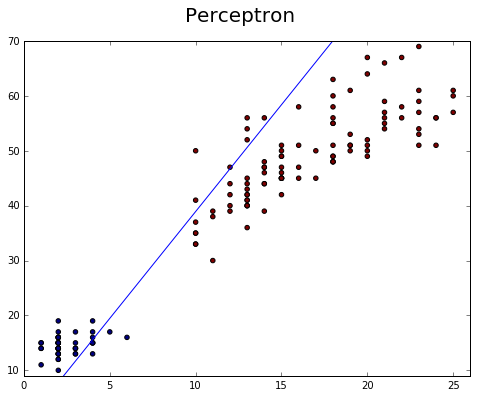

In [6]:
EPOCHS = 200
LEARNING_RATE = 0.1

for i in range(EPOCHS):
    X_matrix, t_vector = shuffle(X_matrix, t_vector, random_state=0)
    
    z_vector = activation_function(np.dot(X_matrix, w_vector)) #.ravel().astype(int)
    #print("z_vector")
    #print(z_vector)
    #print("t_vector")
    #print(t_vector)
    # indentify the misclassifications
    false_pos = np.logical_and(t_vector == 0, z_vector == 1)
    #print(len(false_pos))
    false_neg = np.logical_and(t_vector == 1, z_vector == 0)
    #print(len(false_neg))
    #print(false_neg)
    # add the false negatives
    x_vector = X_matrix[false_neg, :].sum(0)
    x_vector[0] = 1
    x_vector = x_vector.reshape(-1, 1)
    w_vector = w_vector + (LEARNING_RATE * x_vector)
    print("x_vector1")
    print(x_vector)
    # subtract the false positives
    x_vector = X_matrix[false_pos, :].sum(0)
    x_vector[0] = 1
    x_vector = x_vector.reshape(-1, 1)
    w_vector = w_vector - (LEARNING_RATE * x_vector)
    print("x_vector2")
    print(x_vector)
    #print(X_matrix[false_pos, :].sum(0).reshape(-1, 1))
    # plot the data again
    perceptron_figure = plot_decision(X_matrix, t_vector, w_vector)
    perceptron_image = Figtodat.fig2img(perceptron_figure)
    perceptron_images.append(perceptron_image)
    
writeGif("boundary.gif",perceptron_images,duration=0.20, repeat=1, dither=False)